In [101]:
import cv2
import numpy as np
import os
from IPython.display import Image, display 


In [115]:
def imshow(img, ax=None): 
    if ax is None: 
        ret, encoded = cv2.imencode(".jpg", img) 
        display(Image(encoded)) 
    else: 
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

        
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)


def apply_thresholding(image, threshold_value=0, max_value=255, threshold_type= cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU):
    # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    _, thresholded = cv2.threshold(image, threshold_value, max_value, threshold_type)
    return thresholded

def apply_watershed(image, img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
    bin_img = cv2.morphologyEx(image,  
                            cv2.MORPH_OPEN, 
                            kernel, 
                            iterations=2) 
    # sure background area 
    sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
    
    # Distance transform 
    dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
    
    #foreground area 
    ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY) 
    sure_fg = sure_fg.astype(np.uint8)
    
    # unknown area 
    unknown = cv2.subtract(sure_bg, sure_fg) 
    ret, markers = cv2.connectedComponents(sure_fg) 
  
    # Add one to all labels so that background is not 0, but 1 
    markers += 1
    # mark the region of unknown with zero 
    markers[unknown == 255] = 0
    
    markers = cv2.watershed(img, markers) 
  
    
    
    labels = np.unique(markers) 
    
    coins = [] 
    for label in labels[2:]:   
    
    # Create a binary image in which only the area of the label is in the foreground  
    #and the rest of the image is in the background    
        target = np.where(markers == label, 255, 0).astype(np.uint8) 
        
    # Perform contour extraction on the created binary image 
        contours, hierarchy = cv2.findContours( 
            target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE 
        ) 
        coins.append(contours[0]) 
    
    # Draw the outline 
    img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2) 
    # imshow(img)
    return img

In [36]:
# input_directory = './captcha/'
# output_directory = './filtered_captcha/'
# os.makedirs(output_directory, exist_ok=True)

# for filename in os.listdir(input_directory):
#     if filename.endswith('.jpg') or filename.endswith('.png'):
#         image_path = os.path.join(input_directory, filename)

#         captcha_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#         filtered_image = apply_gaussian_blur(captcha_image)
#         filtered_image = apply_thresholding(filtered_image)
#         # filtered_image = apply_morphological_operations(filtered_image)

#         output_path = os.path.join(output_directory, filename)
#         cv2.imwrite(output_path, filtered_image)
        

In [116]:
image_path = 'captcha/captcha_image96.png'
captcha_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply various filters
# filtered_image = apply_gaussian_blur(captcha_image)
# filtered_image = apply_median_filter(captcha_image)
# filtered_image = apply_median_filter(filtered_image)
# filtered_image = apply_bilateral_filter(captcha_image)
# filtered_image = apply_bilateral_filter(filtered_image)
filtered_image = apply_thresholding(captcha_image)
# filtered_image = apply_edge_detection(filtered_image)
# filtered_image = apply_thresholding(filtered_image)
# filtered_image = apply_contrast_enhancement(captcha_image)
# filtered_image = apply_contrast_enhancement(filtered_image)
# filtered_image = apply_morphological_operations(captcha_image)
# filtered_image = apply_morphological_operations(filtered_image)
# filtered_image = apply_edge_detection(captcha_image)
# filtered_image = apply_morphological_operations(captcha_image)
# filtered_image = apply_morphological_operations(filtered_image)
filtered_image = apply_watershed(filtered_image,captcha_image)

# Display the original and filtered images
# cv2.imshow('Original Captcha', captcha_image)
imshow(filtered_image)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'cv::watershed'


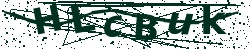

In [120]:
from IPython.display import Image, display 
def imshow(img, ax=None): 
    if ax is None: 
        ret, encoded = cv2.imencode(".jpg", img) 
        display(Image(encoded)) 
    else: 
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
        ax.axis('off') 
  
#Image loading 
img = cv2.imread("captcha/captcha_image97.png") 
  
#image grayscale conversion 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
# Show image 
imshow(img)

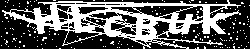

In [159]:
ret, bin_img = cv2.threshold(gray, 
                             0, 255,  
                             cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) 
imshow(bin_img)

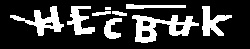

In [161]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 2)) 
bin_img = cv2.morphologyEx(bin_img,  
                           cv2.MORPH_OPEN, 
                           kernel, 
                           iterations=2) 
imshow(bin_img) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


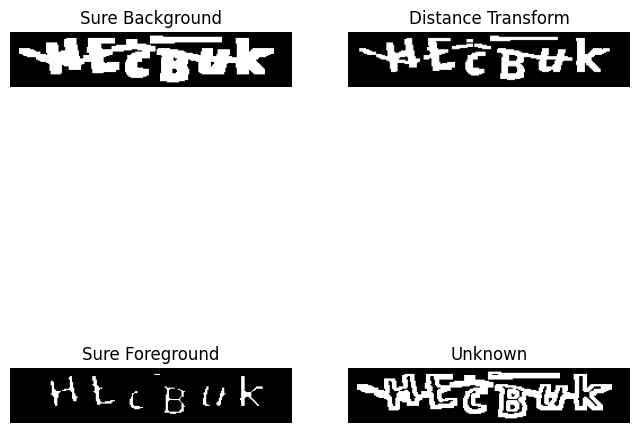

In [153]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8)) 
# sure background area 
sure_bg = cv2.dilate(bin_img, kernel, iterations=2) 
imshow(sure_bg, axes[0,0]) 
axes[0, 0].set_title('Sure Background') 
  
# Distance transform 
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 3) 
imshow(dist, axes[0,1]) 
axes[0, 1].set_title('Distance Transform') 
  
#foreground area 
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY) 
sure_fg = sure_fg.astype(np.uint8)   
imshow(sure_fg, axes[1,0]) 
axes[1, 0].set_title('Sure Foreground') 
  
# unknown area 
unknown = cv2.subtract(sure_bg, sure_fg) 
imshow(unknown, axes[1,1]) 
axes[1, 1].set_title('Unknown') 
  
plt.show()

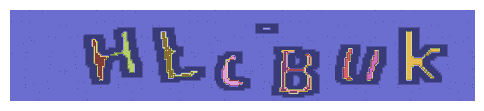

In [138]:
ret, markers = cv2.connectedComponents(sure_fg) 
  
# Add one to all labels so that background is not 0, but 1 
markers += 1
# mark the region of unknown with zero 
markers[unknown == 255] = 0
  
fig, ax = plt.subplots(figsize=(6, 6)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show()

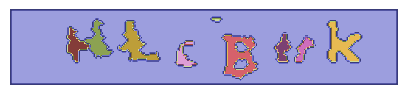

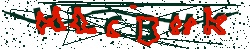

In [137]:
# watershed Algorithm 
markers = cv2.watershed(img, markers) 
  
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.imshow(markers, cmap="tab20b") 
ax.axis('off') 
plt.show() 
  
  
labels = np.unique(markers) 
  
coins = [] 
for label in labels[2:]:   
  
# Create a binary image in which only the area of the label is in the foreground  
#and the rest of the image is in the background    
    target = np.where(markers == label, 255, 0).astype(np.uint8) 
    
  # Perform contour extraction on the created binary image 
    contours, hierarchy = cv2.findContours( 
        target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE 
    ) 
    coins.append(contours[0]) 
  
# Draw the outline 
img = cv2.drawContours(img, coins, -1, color=(0, 23, 223), thickness=2) 
imshow(img)